# Imports

In [1]:
import glob
import os
import pandas as pd 
import numpy as np 
import regex as re 
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

# Load data

In [4]:
df_street = pd.read_pickle('./street_2017_2021.pkl')
df_street.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,e87d48c72a99bc0dcccd17bfade3d5e2aaae6cb6ab5c57...,2017-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Burglary,Under investigation,NaN
1,9500972e2e3c87dc23b65885dd61085ee8a39329c03792...,2017-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.513308,51.409456,On or near Charlton Road,E01014399,Bath and North East Somerset 001A,Burglary,Under investigation,NaN
2,2183c598f1727df485b41f8414f7b05b4b4896af615564...,2017-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Under investigation,NaN
3,8e6ae250f68623b82068cd3c79b64b05a559f6d9c9393c...,2017-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509384,51.409590,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
4,052b551445726eeac6f504dfaa2d32c184b9877b81e82e...,2017-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.495055,51.422132,On or near Cross Street,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Under investigation,NaN


In [ ]:
import pickle as pkl
import pandas as pd
with open("./street_2017_2021.pkl", "rb") as f:
    object = pkl.load(f)
    
df = pd.DataFrame(object)
df.to_csv(r'street_merged.csv')

# EDA

### Data types

In [5]:
df_street.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31075114 entries, 0 to 4636
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 3.0+ GB


### Missing values

In [6]:
def perc_missing_values(df):
    print(df.isnull().sum().sum()/df.count(axis=0, level=None, numeric_only=False).sum() * 100)

In [7]:
perc_missing_values(df_street)

15.774070434568657


#### 15.8 % of values in the concatenated `Street` df are missing.

In [8]:
# street
pd.DataFrame(df_street.isnull().sum())

,0
Crime ID,7671031
Month,0
Reported by,0
Falls within,0
Longitude,593620
Latitude,593620
Location,0
LSOA code,1366967
LSOA name,1366967
Crime type,0


#### The  `Context` column is not relevant and can be dropped from the `Street` dataset. Other columns/ rows have not yet been dropped in case they are required for further analysis later. 

In [9]:
df_street = df_street.drop('Context',axis=1)

### Distributions

In [10]:
crime_df = pd.DataFrame(df_street['Crime type'].value_counts()).reset_index().rename(columns={'index':'Crime type', 'Crime type':'Counts'})

### Police forces

In [11]:
df_street['Reported by'].unique()

array(['Avon and Somerset Constabulary', 'Bedfordshire Police',
       'Cambridgeshire Constabulary', 'Cheshire Constabulary',
       'City of London Police', 'Cleveland Police',
       'Cumbria Constabulary', 'Derbyshire Constabulary',
       'Devon & Cornwall Police', 'Dorset Police', 'Durham Constabulary',
       'Dyfed-Powys Police', 'Essex Police',
       'Gloucestershire Constabulary', 'Greater Manchester Police',
       'Gwent Police', 'Hampshire Constabulary',
       'Hertfordshire Constabulary', 'Humberside Police',
       'Lancashire Constabulary', 'Leicestershire Police',
       'Lincolnshire Police', 'Merseyside Police',
       'Metropolitan Police Service', 'Norfolk Constabulary',
       'North Wales Police', 'North Yorkshire Police',
       'Northamptonshire Police', 'Police Service of Northern Ireland',
       'Northumbria Police', 'Nottinghamshire Police',
       'South Wales Police', 'South Yorkshire Police',
       'Staffordshire Police', 'Suffolk Constabulary', 'Surr

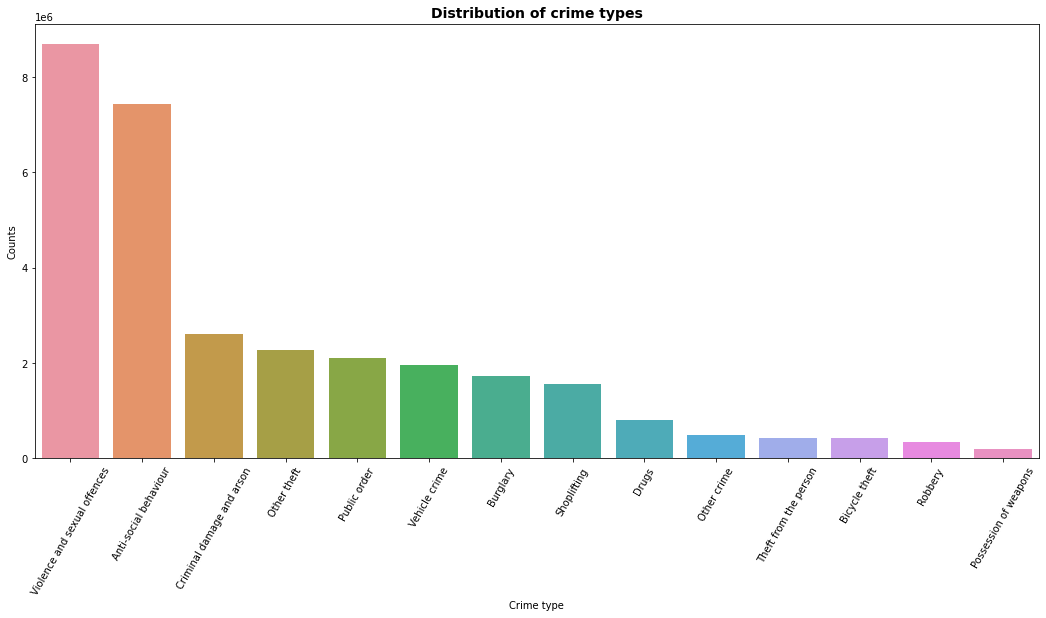

In [12]:
plt.figure(figsize=(18,8))
sns.barplot(x='Crime type', y='Counts', data=crime_df)
plt.title('Distribution of crime types',weight='bold',size=14)
plt.xticks(rotation=60);

### Heatmap of crimes

#### The Street dataset has no values for November and December of 2021

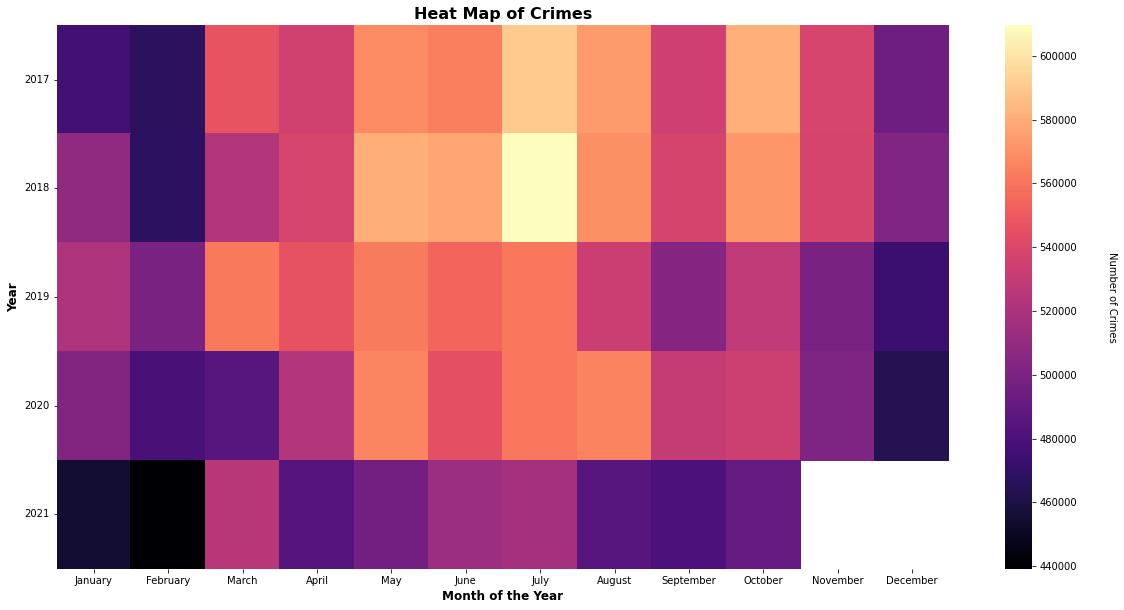

In [13]:
df_street.Month = pd.to_datetime(df_street.Month)
time_df = pd.DataFrame(df_street.groupby([df_street.Month.dt.year, df_street.Month.dt.month]).describe()['Longitude']['count'])

x_labels=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(20,10))
heat = sns.heatmap(time_df.unstack(), xticklabels=x_labels, cmap='magma');
plt.yticks(rotation=0) 
heat.set_title('Heat Map of Crimes', size=16, weight="bold")
heat.set_xlabel('Month of the Year',size=12,weight='bold')
heat.set_ylabel('Year',size=12,weight='bold')
cbar = heat.collections[0].colorbar
cbar.set_label('Number of Crimes', labelpad=40, rotation=270);

## Focusing on City of London Police

In [14]:
london_df = df_street[df_street['Reported by']=='City of London Police']
london_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,356f6e3b1e3585e37630f2c954e85b55b949d862a46472...,2017-01-01,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Under investigation
1,425136f379532188f454a14ab804f1b06e31ce87ca4fa2...,2017-01-01,City of London Police,City of London Police,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Other theft,Under investigation
2,f67748242989f072c1739c336701b5389ed91c8b524690...,2017-01-01,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Under investigation
3,e05ff11a48d2201cc547639bc162ccb2dc24253642ef0b...,2017-01-01,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Under investigation
4,NaN,2017-01-01,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,City of London 001A,Anti-social behaviour,NaN


In [15]:
london_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36832 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Crime ID               30982 non-null  object        
 1   Month                  36832 non-null  datetime64[ns]
 2   Reported by            36832 non-null  object        
 3   Falls within           36832 non-null  object        
 4   Longitude              34221 non-null  float64       
 5   Latitude               34221 non-null  float64       
 6   Location               36832 non-null  object        
 7   LSOA code              34221 non-null  object        
 8   LSOA name              34221 non-null  object        
 9   Crime type             36832 non-null  object        
 10  Last outcome category  30982 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 3.4+ MB


In [16]:
perc_missing_values(london_df)

5.781602473055393


In [17]:
pd.DataFrame(london_df.isnull().sum())

,0
Crime ID,5850
Month,0
Reported by,0
Falls within,0
Longitude,2611
Latitude,2611
Location,0
LSOA code,2611
LSOA name,2611
Crime type,0


<AxesSubplot:>

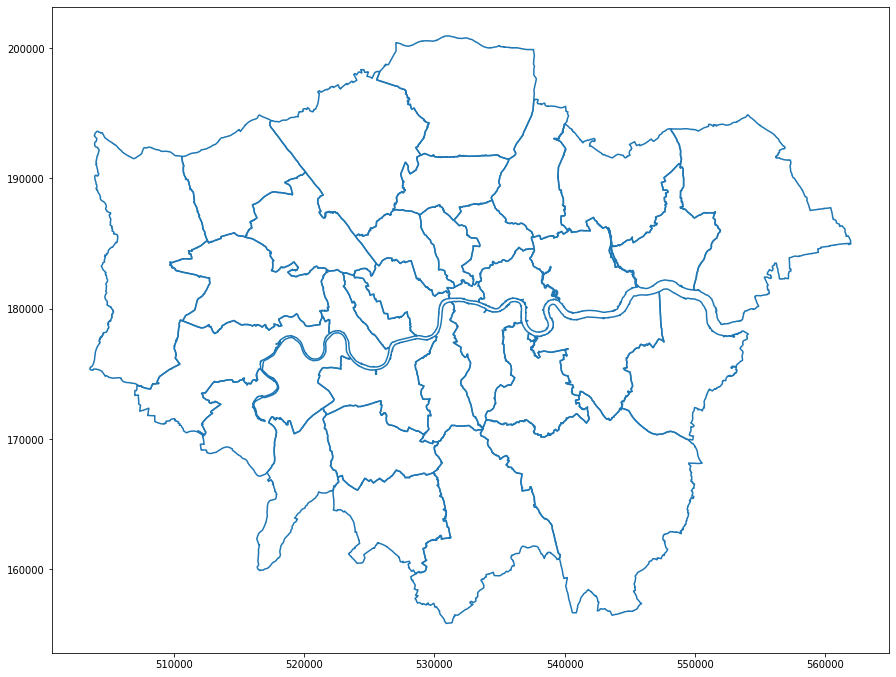

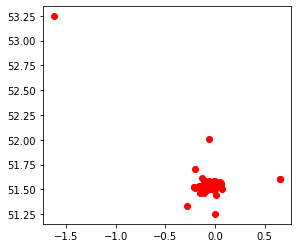

In [18]:
import geopandas as gpd
 
# Load London Boroughs shapefile to show borders on map
LB_file = 'C:/Users/lonew/Downloads/statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp' # Replace this with local filepath/name
gdf = gpd.read_file(LB_file) # Read file into a geodataframe

# Plot the geodataframe

gdf.boundary.plot(figsize=(15,15));

pdf = gpd.GeoDataFrame(london_df, geometry=gpd.points_from_xy(london_df.Longitude, london_df.Latitude))
pdf.plot( color='red')

In [19]:
pdf = gpd.GeoDataFrame(london_df, geometry=gpd.points_from_xy(london_df.Longitude, london_df.Latitude), crs= {'init': 'epsg:4326'})
pdf.head()

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,geometry
0,356f6e3b1e3585e37630f2c954e85b55b949d862a46472...,2017-01-01,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Under investigation,POINT (-0.11150 51.51823)
1,425136f379532188f454a14ab804f1b06e31ce87ca4fa2...,2017-01-01,City of London Police,City of London Police,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Other theft,Under investigation,POINT (-0.11326 51.51682)
2,f67748242989f072c1739c336701b5389ed91c8b524690...,2017-01-01,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Under investigation,POINT (-0.11377 51.51737)
3,e05ff11a48d2201cc547639bc162ccb2dc24253642ef0b...,2017-01-01,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Under investigation,POINT (-0.11377 51.51737)
4,NaN,2017-01-01,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,City of London 001A,Anti-social behaviour,NaN,POINT (-0.09774 51.52021)


<AxesSubplot:>

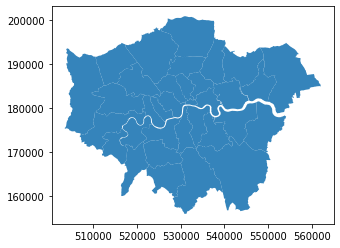

In [20]:
fig, ax = plt.subplots()
gdf.plot(ax=ax,alpha=0.9)

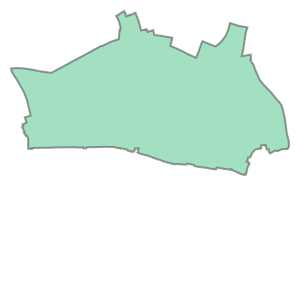

In [21]:
gdf.loc[32, 'geometry']

                        geometry
0      POINT (-0.11150 51.51823)
1      POINT (-0.11326 51.51682)
2      POINT (-0.11377 51.51737)
3      POINT (-0.11377 51.51737)
4      POINT (-0.09774 51.52021)
...                          ...
36827                POINT EMPTY
36828                POINT EMPTY
36829                POINT EMPTY
36830                POINT EMPTY
36831                POINT EMPTY

[36832 rows x 1 columns]


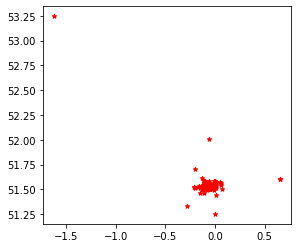

In [22]:
from shapely.geometry import Point
lo = [i for i in london_df.Longitude if i != np.nan]
la = [i for i in london_df.Latitude if i != np.nan]
delhi_map = gdf.loc[32,'geometry']
fig,ax = plt.subplots()
delhi_map
geometry = [Point(xy) for xy in zip(lo,la)]
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Delhi')
plt.show()

In [23]:
london_df2 = london_df[london_df.Latitude.notnull()]
BBox = (london_df2.Longitude.min(),   london_df2.Longitude.max(),      
         london_df2.Latitude.min(), london_df2.Latitude.max())
         
         
BBox

(-1.621245, 0.652838, 51.252939000000005, 53.245553)

In [24]:
london_df2 = london_df2[london_df2['Latitude'] < 56]

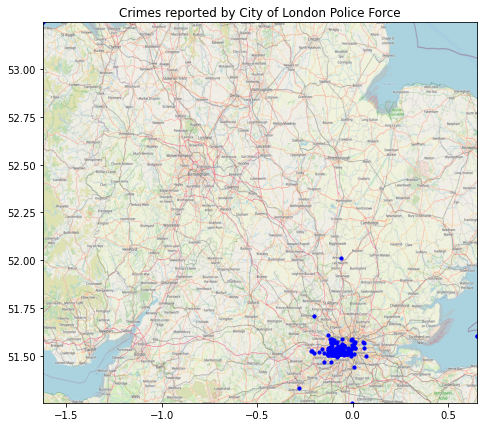

In [25]:
ruh_m = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(london_df.Longitude, london_df.Latitude, c='b', s=10)
ax.set_title('Crimes reported by City of London Police Force')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [26]:
borough = pd.DataFrame(pd.read_excel('./Extra Data/MPS Use of Force - FY20-21.xlsx',engine='openpyxl')['Borough'].value_counts())

In [27]:
borough_crime = borough.reset_index().rename(columns = {'index':'borough','Borough':'crime'})

In [28]:
fp = 'C:/Users/lonew/Downloads/statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
map_df = gpd.read_file(fp)

In [29]:
merged = map_df.set_index('NAME').join(borough_crime.set_index('borough'))
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,crime
NAME,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",2901.0
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",8499.0
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",4428.0
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",4357.0
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",5712.0


In [30]:
borough_crime.max()

borough    Wandsworth
crime           12021
dtype: object

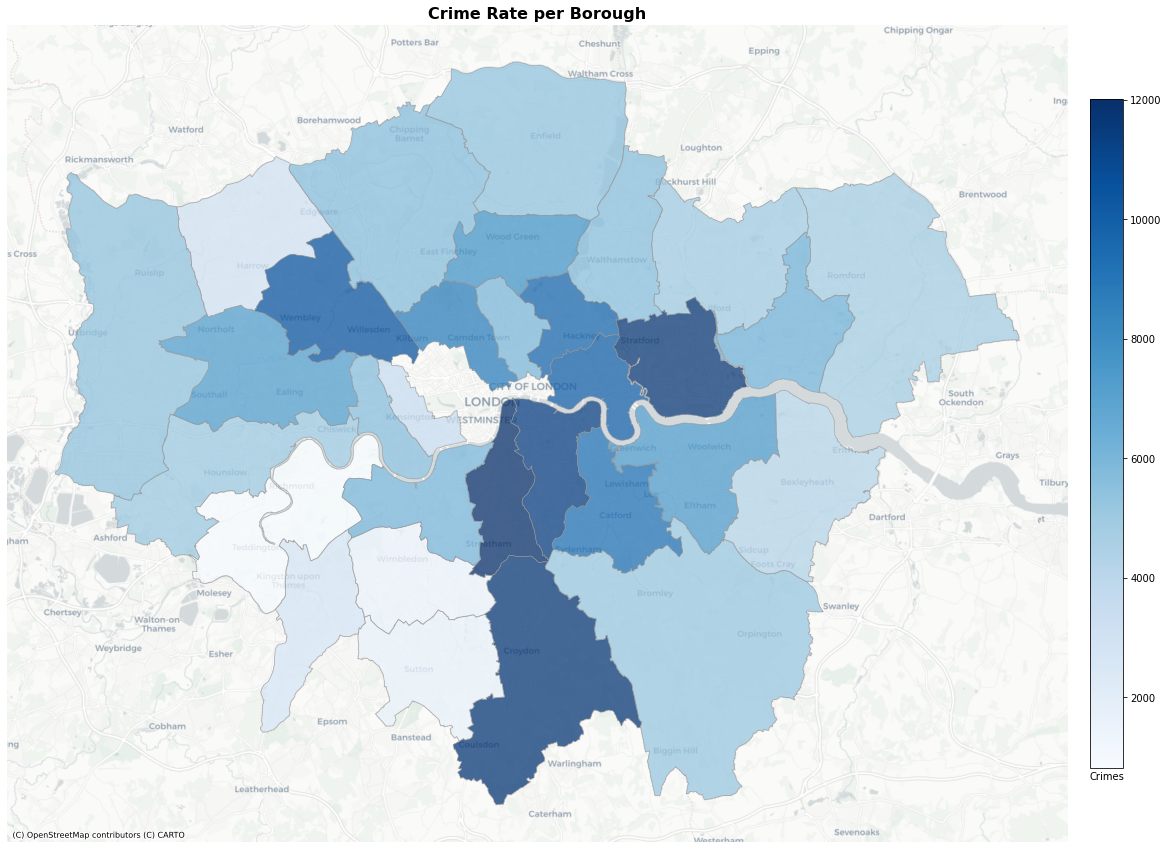

In [31]:
fig, ax = plt.subplots(1, figsize=(20, 20))
merged = merged.to_crs(epsg=3857)
variable='crime'
vmin=817
vmax=12021
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.6',alpha=0.75)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.axis('off')
ax.set_title('Crime Rate per Borough',weight='bold',size=16);
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm,fraction=0.03, pad=0.02)
cbar.ax.set_xlabel('Crimes');


In [62]:
#time_df['Crime Rate'] = time_df.pct_change()
time_df

count  Crime Rate
Month Month                      
2017  1      475902.0         NaN
      2      467707.0   -0.017220
      3      546994.0    0.169523
      4      535297.0   -0.021384
      5      567705.0    0.060542
      6      563983.0   -0.006556
      7      590832.0    0.047606
      8      574064.0   -0.028380
      9      534318.0   -0.069236
      10     581270.0    0.087873
      11     538324.0   -0.073883
      12     495018.0   -0.080446
2018  1      508654.0    0.027546
      2      468433.0   -0.079073
      3      523475.0    0.117502
      4      538054.0    0.027850
      5      580857.0    0.079551
      6      577057.0   -0.006542
      7      609573.0    0.056348
      8      569642.0   -0.065507
      9      537451.0   -0.056511
      10     572169.0    0.064598
      11     537359.0   -0.060839
      12     501953.0   -0.065889
2019  1      520807.0    0.037561
      2      499538.0   -0.040839
      3      561762.0    0.124563
      4      545818.0   -0.028382
      5      562462.0    0.030494
      6      554787.0   -0.013645
      7      561342.0    0.011815
      8      532822.0   -0.050807
      9      503871.0   -0.054335
      10     527999.0    0.047885
      11     499196.0   -0.054551
      12     473709.0   -0.051056
2020  1      502957.0    0.061743
      2      479093.0   -0.047447
      3      485008.0    0.012346
      4      523059.0    0.078454
      5      565774.0    0.081664
      6      544887.0   -0.036918
      7      561034.0    0.029634
      8      565204.0    0.007433
      9      530857.0   -0.060769
      10     533555.0    0.005082
      11     501133.0   -0.060766
      12     464259.0   -0.073581
2021  1      455752.0   -0.018324
      2      439177.0   -0.036368
      3      524787.0    0.194933
      4      483714.0   -0.078266
      5      495975.0    0.025348
      6      513274.0    0.034879
      7      517112.0    0.007477
      8      484471.0   -0.063122
      9      480282.0   -0.008647
      10     489926.0    0.020080